## Station Quiz - Week 3

Grading Rubric (per question):  
2 points if complete and correct  
1 point if incomplete or incorrect  
0 points if no attempt made  

The following questions should be completed with your mates at the station you decided to sit at today. Your station should designate one person to be the one who submits (commits/pushes) the answers to the quiz in their repo. We'll call this person the **designated submitter**. You all have 50 minutes (i.e. the end of class) to complete these questions. Do not change anything in this file above the line.

***

**#0** Pull this ipynb file from your respective **assignments_section_sp20** repo; either **assignments_section2_sp20** or **assignments_section3_sp20**. Copy it into your personal repo to begin answering the questions, but rename the file as station_quiz_week_03_Netid.ipynb with your Netid. (GitHub)

**#1** Using Markdown syntax (not SAS syntax), make a list of the first and last names all mates (including yourself) at your station. Be sure to write the designated submitter's name in bold font. (Markdown)  

**#2** Using the visualization below, describe what's happening in the plot and the relationship among the variables in it.
![](https://uofi.box.com/shared/static/egzi1oi4nctrlvubanzwieeou38y76ln.png)

**#3**  Now, physically move to another station and ask one person the same questions in **Problem 2** (above). Write down their first and last name as well as their answers to those questions get credit for this **Problem 3** with Markdown syntax.  

**#4** Look through the Datasets file which contains basic information about the **CCSO Bookings Data** (see course website). Read about it and use SAS and the DATA step to import the data from the URL. Rename the data object as "ccso". (SAS, Accessing and Importing Data)

**#5** With SAS, create a new subset of the CCSO Bookings Data that: 
  - creates a new variable "hoursserved" that records the time spent in jail in hours (this variable does not already exist)
  - creates a new variable "yearsserved" that records the time spent in jail in years 
  - creates an indicator variable called "nationalmedtimeserved" which equals "greater than" if years in jail > 1.3
  - filter so that we only keep observations that are hoursserved > 24.
Now, show only the first 10 rows of the subset and the variables: nationalmedtimeserved, hoursserved, employmentstatus, race, sex, and released reason. (SAS, Data Wrangling)  

**#6** Beginning with the CCSO Bookings Data in **Problem 4**, use the code below to create the contingency table with measures of association. Please describe the measure of the association between monthbin and whitebin and compare it to the Spearman correlation. (SAS, Data Wrangling, Data Descriptives, Markdown)
```
data ccso;
 set ccso;
 if daysinjail>30 then monthbin=1;
  else monthbin=0;
 if race="White" then whitebin=1;
  else whitebin=0;
run;
proc freq data=ccso;
 tables monthbin*whitebin / chisq;
 ods select chisq;
run;
proc corr data=ccso spearman;
 var monthbin whitebin;
 ods select spearmancorr;
run;
```

**#7** Are the male and female distributions of daysinjail far from normal? You must show the QQplot for both groups and answer the question in words. (SAS, Data Descriptives, Data Visualization, Markdown)

**#8** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**), create a new subset that
  - filters on the "Cash Bond Posted" as the released reason
  - creates a new indicator variable that either equals 1 when the daysinjail variable >30 or equals 0 otherwise.  
Now create a bar plot that shows the frequency of racial groups among the levels of the new indicator variable. (SAS, Data Wrangling, Data Visualization, Visual Design Principles)

**#9** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**) recreate the plot below. This plot uses the visual design ideas from Knaflic's **Storytelling with Data** book. (SAS, Data Visualization, Visual Design Principles)
![](https://uofi.box.com/shared/static/hfihdwa9649y64018jd5ggxzeyt0b3kd.png)

**#10** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**), recreate the plot below. This plot uses the visual design ideas from Knaflic's **Storytelling with Data** book. Also, describe the relationship among the variables in the plot. (SAS, Data Visualization, Visual Design Principles, Markdown)
![](https://uofi.box.com/shared/static/re3g9swcoabd6yayhq4kckbbjhnrjmee.png)

**#00** The **designated submitter** should commit and push the file to their repo with the commit message "All Done".

Problem 1: Blessing Ibe, Edward Chen, Andrea Ayala, Emily Ciaccio, Garvit Narang, Mehmet Yalcin Aydin, Brein Mosely, Junjing Liu, **Andro Manukov**

Problem 2:  
This visual is plotting the default rate over time from 1970 to 2010.  
The graph is separated into two sections, before and after the online banking era. It also includes the recession of 2008.
The default rates were higher prior to the banking era. The rates have again increased during the recession times (indicated with triangles).
I think the goal of this graph is to show how online banking has improved the overall quality of life of banking by making it much easier to make payments on time.


Problem 3:  
Isaias Lopez
The graph shows the relationship between default rate and disbursement in Illinois and nation. At the start of the online banking era, there is a sharp decrease in default rates in Illinois with all other states. When the recession hit, the default rate increased. To conclude, there is a negative correlation between default rates and disbursement time. 



Problem 4:

In [3]:
filename jail1 url  "https://uofi.box.com/shared/static/9elozjsg99bgcb7gb546wlfr3r2gc9b7.csv" termstr=crlf;

data ccso;
length city $40. state $40. race $30. INCARCERATIONREASON $80. crimecode $80. employmentstatus $80. 
       citizenship $40. school $80. occupation $80. maritalstatus $40. chargestatute $80.
       prisonertype $40. arrestagency $80. releasedreason $80.;
 infile jail1 dsd firstobs=2 missover;
 input BOOKINGDATE :mmddyy10. BOOKINGNUMBER BOOKINGTIME :time20.3 CUSTODYCLASS $ EMPLOYMENTSTATUS $
       INCARCERATIONREASON $ JACKETNUMBER JACKETTYPE $ PRISONERTYPE $ RELEASEDDATE :mmddyy10.
       RELEASEDREASON $ RELEASEDTIME :time20.3 CHARGESTATUTE $ CRIMECODE $ STATUTETYPE $
       CITY $ RACE $ SEX $ STATE $ ZIPCODE 
       CITIZENSHIP $ MARITALSTATUS $ MILITARY $ OCCUPATION $ SCHOOL $
       ARRESTAGENCY $ AgeatArrest AgeatRelease BookingDateTime :anydtdtm40. ReleaseDateTime :anydtdtm40. 
       DaysinJail Hours Minutes Seconds;
format BOOKINGDATE mmddyy10. RELEASEDDATE mmddyy10. bookingtime time20.3 releasedtime time20.3 bookingdatetime datetime. 
       releasedatetime datetime.;
run;

Problem 5:

In [8]:
*PROBLEM 5;
data ccso2;
 set ccso;
 hoursserved = intck('dthour', BookingDateTime, ReleaseDateTime);
 yearsserved = intck('dtyear', BookingDateTime, ReleaseDateTime);
  if yearsserved > 1.3 then nationalmedtimeserved = 1;
  else nationalmedtimeserved = 0;
  if hoursserved <= 24 then delete;
run;
proc print data=ccso2(obs=10);
 var nationalmedtimeserved hoursserved employmentstatus race SEX releasedreason;
run;

Obs,nationalmedtimeserved,hoursserved,employmentstatus,race,SEX,releasedreason
1,0,1392,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
2,0,1392,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
3,0,826,Unemployed,White,Male,Placed on Probation Y
4,0,76,Employed - Full Time,Black,Male,Cash Bond Posted
5,0,1602,Unemployed,Black,Male,Cash Bond Posted
6,0,599,Unemployed,White,Male,Sentenced (transfer) to State Corrections Y
7,0,599,Unemployed,White,Male,Sentenced (transfer) to State Corrections Y
8,0,79,Unemployed,Black,Male,Release on Personal Recognizance Y
9,0,32,,White,Female,Cash Bond Posted
10,0,32,,White,Female,Cash Bond Posted


Problem 6:

In [7]:
data ccso;
 set ccso;
 if daysinjail>30 then monthbin=1;
  else monthbin=0;
 if race="White" then whitebin=1;
  else whitebin=0;
run;
proc freq data=ccso;
 tables monthbin*whitebin / chisq;
 ods select chisq;
run;
proc corr data=ccso spearman;
 var monthbin whitebin;
 ods select spearmancorr;
run;

Problem 7:


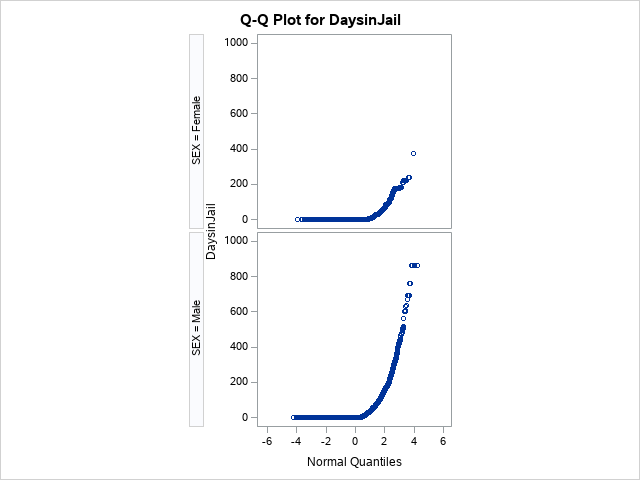

In [9]:
*PROBLEM 7;
data ccso3;
    set ccso;
    keep SEX daysinjail;
run;
title1 "QQ Plot for Different Genders";
proc univariate data=ccso3 ;
    qqplot daysinjail / square;
    class SEX;
run;
title1;


*QUESTION: Are the male and female distributions of daysinjail far from normal?;  

*ANSWER IN WORDS: Yes! As the points on qqplot are far from a straight line, that tends to indicate a distribution that is not close to normal. Thus, the daysinjail distribution is not normal.; 

Problem 8:


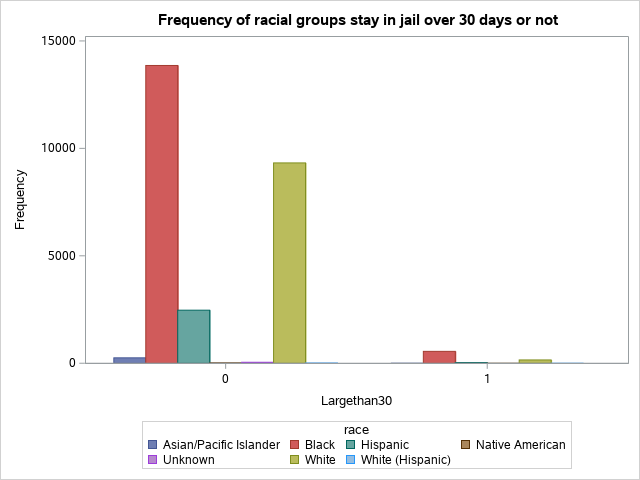

In [11]:
data ccso;
 set ccso;
 title1 "Frequency of racial groups stay in jail over 30 days or not";
 where RELEASEDREASON = "Cash Bond Posted";
 if DaysinJail > 30 then Largethan30 = 1;
  else Largethan30 = 0;
run;
proc sgplot data=ccso;
 vbar Largethan30 / group=RACE groupdisplay=cluster;
run;

Problem 9:


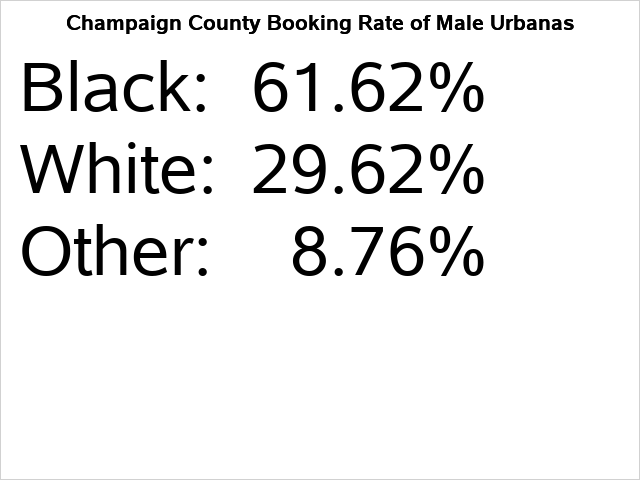

In [6]:
title1 "Champaign County Booking Rate of Male Urbanas";

proc sgplot data=ccso noborder noautolegend nowall;
title1 height=15pt "Champaign County Booking Rate of Male Urbanas" ;
scatter x=EMPLOYMENTSTATUS y=EMPLOYMENTSTATUS / markerattrs=(color='white');
inset ("Black: " = "61.62%" "White: " = "29.62%" "Other: " = "8.76%") / textattrs = (SIZE=50 COLOR='black');
xaxis display=none;
yaxis display=none;
run;
title1;

Problem 10:


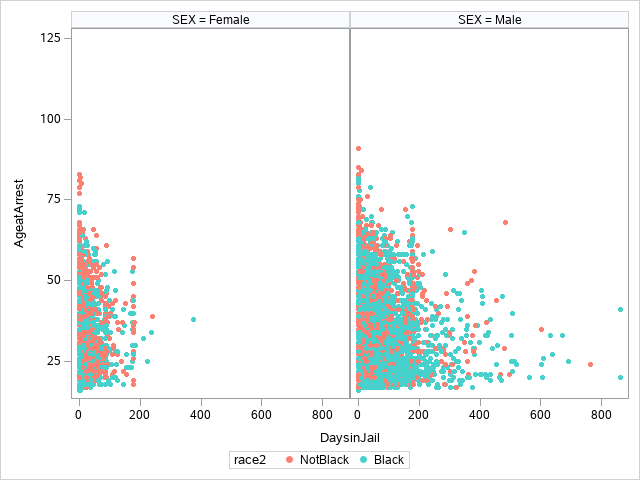

In [10]:
data ccso;
length city $40. state $40. race $30. INCARCERATIONREASON $80. crimecode $80. employmentstatus $80. 
       citizenship $40. school $80. occupation $80. maritalstatus $40. chargestatute $80.
       prisonertype $40. arrestagency $80. releasedreason $80.;
 infile jail1 dsd firstobs=2 missover;
 input BOOKINGDATE :mmddyy10. BOOKINGNUMBER BOOKINGTIME :time20.3 CUSTODYCLASS $ EMPLOYMENTSTATUS $
       INCARCERATIONREASON $ JACKETNUMBER JACKETTYPE $ PRISONERTYPE $ RELEASEDDATE :mmddyy10.
       RELEASEDREASON $ RELEASEDTIME :time20.3 CHARGESTATUTE $ CRIMECODE $ STATUTETYPE $
       CITY $ RACE $ SEX $ STATE $ ZIPCODE 
       CITIZENSHIP $ MARITALSTATUS $ MILITARY $ OCCUPATION $ SCHOOL $
       ARRESTAGENCY $ AgeatArrest AgeatRelease BookingDateTime :anydtdtm40. ReleaseDateTime :anydtdtm40. 
       DaysinJail Hours Minutes Seconds;
format BOOKINGDATE mmddyy10. RELEASEDDATE mmddyy10. bookingtime time20.3 releasedtime time20.3 bookingdatetime datetime. 
       releasedatetime datetime.;
run;

data ccso_race;
	length race2 $8;
	set ccso;
	if race = "Black" then race2 = "Black";
		else race2 = "NotBlack";
run;

data attrmap1;
 input id $ value $ markercolor $ fillcolor $;
 datalines;
 myid Black CX48D1CC CX48D1CC
 myid NotBlack salmon salmon
 ;
run;
 
proc sgpanel data = ccso_race dattrmap = attrmap1;
	panelby sex;
	scatter x = daysinjail y = ageatarrest / group = race2 
	markerattrs=(symbol=circlefilled) attrid = myid;
run;	

ods text = "Men on average spend longer in jail than females, though the majority of both spend between 0 and 200 days. There seems to be a larger disparity in race with black males than black females. There is a higher proportion of incarcerated blacks, about half for female and the majority of males, even though blacks are not the majority of the population";